In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train),(X_test, y_test) = datasets.cifar10.load_data()

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize=(4,1))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

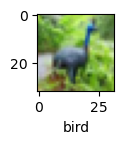

In [11]:
plot_sample(X_train, y_train,6)

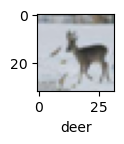

In [12]:
plot_sample(X_train, y_train, 20)

In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000,activation = 'relu'),
    layers.Dense(1000,activation = 'relu'),
    layers.Dense(10,activation = 'softmax'),
    ])


ann.compile(optimizer = "SGD",
           loss = "sparse_categorical_crossentropy",
           metrics = ["accuracy"])


ann.fit(X_train, y_train, epochs= 3)

Epoch 1/3
1563/1563 [==============================] - 126s 80ms/step - loss: 1.8153 - accuracy: 0.3534
Epoch 2/3
1563/1563 [==============================] - 116s 74ms/step - loss: 1.6247 - accuracy: 0.4258
Epoch 3/3
1563/1563 [==============================] - 122s 78ms/step - loss: 1.5422 - accuracy: 0.4568


In [14]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("classification report:\n",classification_report(y_test, y_pred_classes))

313/313 [==============================] - 9s 27ms/step
classification report:
               precision    recall  f1-score   support

           0       0.61      0.35      0.45      1000
           1       0.72      0.31      0.43      1000
           2       0.31      0.40      0.35      1000
           3       0.36      0.25      0.29      1000
           4       0.45      0.32      0.37      1000
           5       0.38      0.35      0.37      1000
           6       0.44      0.62      0.52      1000
           7       0.58      0.47      0.52      1000
           8       0.39      0.81      0.53      1000
           9       0.49      0.54      0.51      1000

    accuracy                           0.44     10000
   macro avg       0.47      0.44      0.43     10000
weighted avg       0.47      0.44      0.43     10000



In [15]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

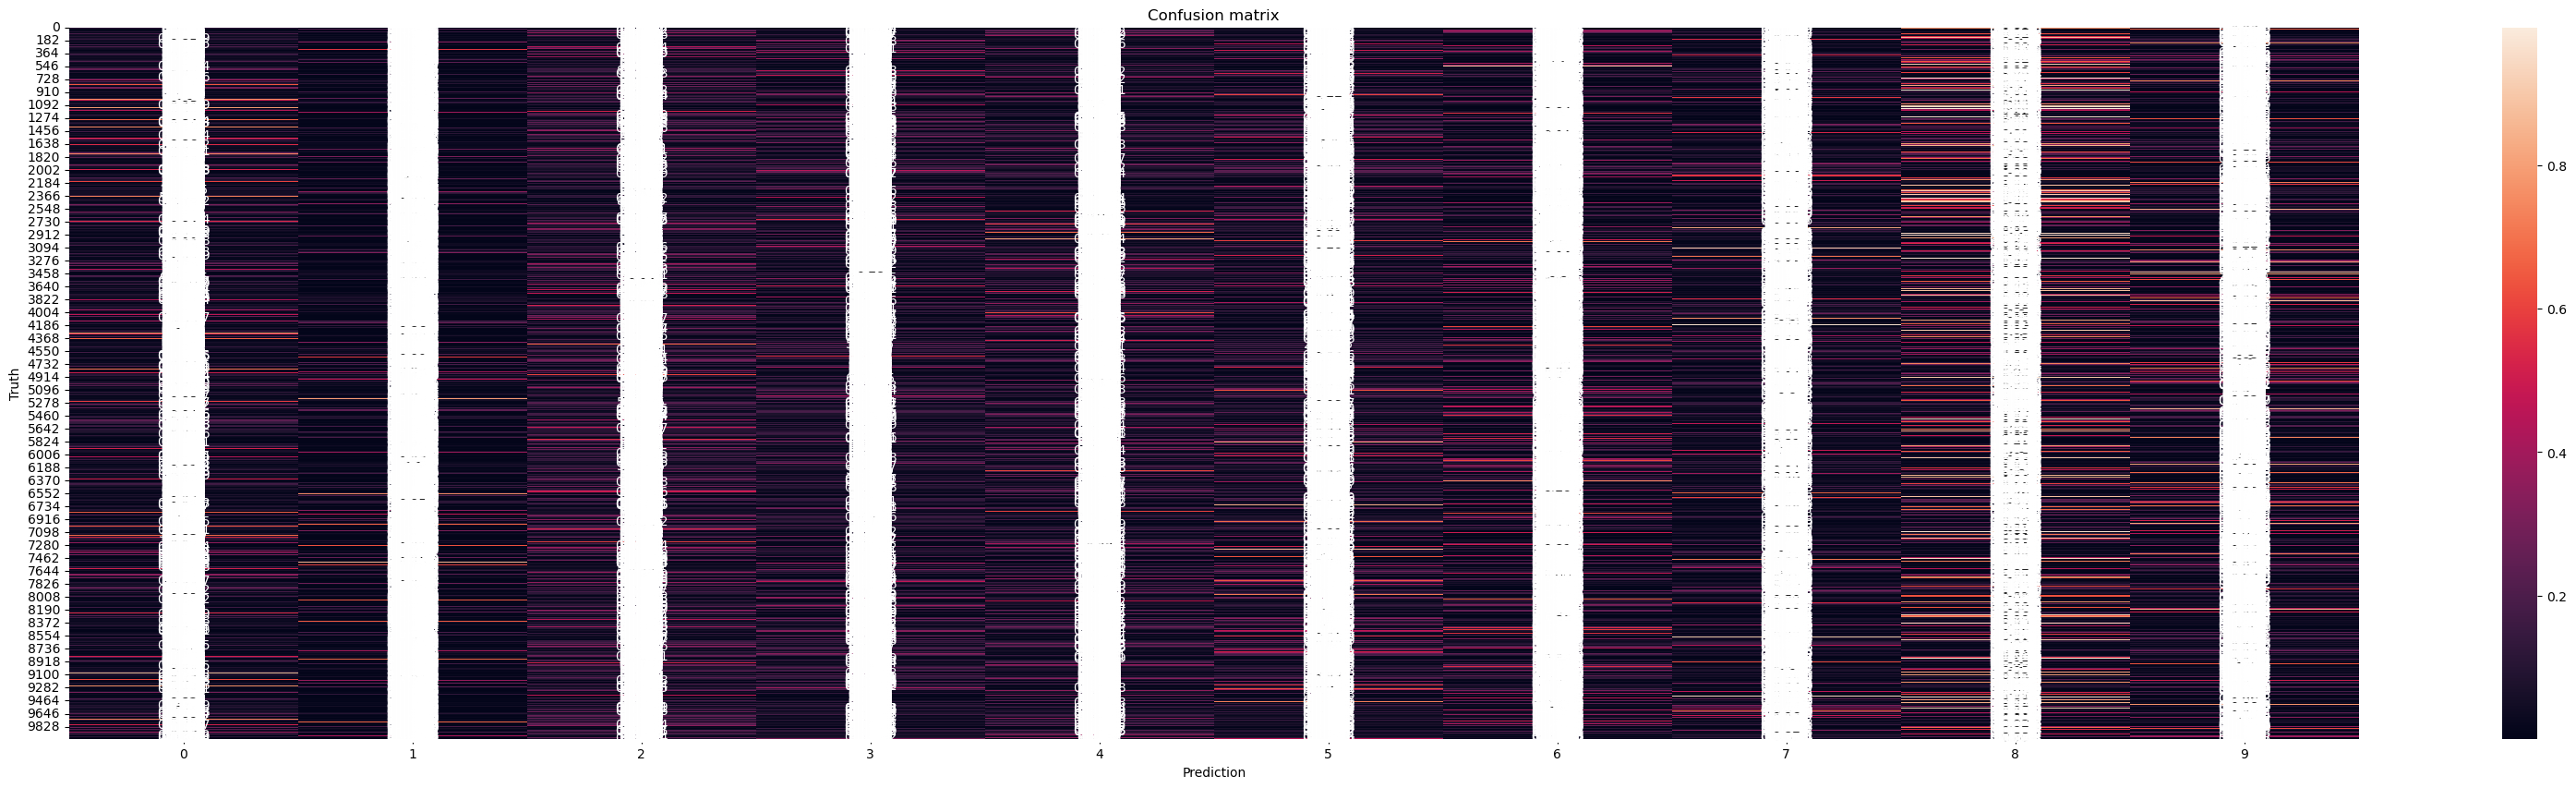

In [16]:
plt.figure(figsize = (40,10))
sns.heatmap(y_pred, annot = True)
plt.ylabel("Truth")
plt.xlabel("Prediction")
plt.title("Confusion matrix")
plt.show

In [56]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3),activation= "relu", input_shape=(32, 32,3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=32, kernel_size=(3,3),activation= "relu"),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation= "relu"),
    layers.Dense(10, activation= "softmax")  
])

In [57]:
cnn.compile(optimizer = "SGD",
           loss = "sparse_categorical_crossentropy",
           metrics = ["accuracy"])

In [58]:
cnn.fit(X_train, y_train, epochs= 4)

Epoch 1/4
1563/1563 [==============================] - 53s 33ms/step - loss: 1.9951 - accuracy: 0.2752
Epoch 2/4
1563/1563 [==============================] - 26s 17ms/step - loss: 1.6240 - accuracy: 0.4153
Epoch 3/4
1563/1563 [==============================] - 26s 17ms/step - loss: 1.4567 - accuracy: 0.4761
Epoch 4/4
1563/1563 [==============================] - 28s 18ms/step - loss: 1.3507 - accuracy: 0.5201


In [59]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 1.4769 - accuracy: 0.4798


[1.476854920387268, 0.4797999858856201]

In [60]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 5ms/step


array([[2.79789278e-03, 4.85962140e-04, 9.13731828e-02, 2.86145002e-01,
        1.69847626e-02, 1.41791835e-01, 4.46450531e-01, 3.42778815e-03,
        9.37974267e-03, 1.16333691e-03],
       [1.10736810e-01, 4.15474586e-02, 8.77120008e-04, 1.62715369e-04,
        4.61422693e-04, 1.62431716e-05, 2.13277104e-04, 1.73655262e-05,
        8.28357160e-01, 1.76103543e-02],
       [1.13993384e-01, 1.49920315e-01, 2.51169391e-02, 9.58229881e-03,
        4.79404721e-03, 3.00740404e-03, 6.13999180e-03, 2.22950382e-03,
        6.06012523e-01, 7.92036131e-02],
       [3.18664044e-01, 1.18010435e-02, 1.67613141e-02, 1.92303525e-03,
        5.89526631e-03, 1.94761364e-04, 4.77570342e-03, 1.49150880e-03,
        6.20848954e-01, 1.76444501e-02],
       [1.75195804e-03, 4.17418254e-04, 9.94616523e-02, 3.00849136e-02,
        3.30546081e-01, 1.19185066e-02, 5.12236238e-01, 1.24900769e-02,
        4.57306101e-04, 6.35828241e-04]], dtype=float32)

In [61]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[6, 8, 8, 8, 6]

In [62]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

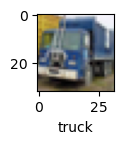

In [92]:
plot_sample(X_test, y_test, 14)

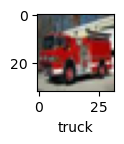

In [93]:
plot_sample(X_test, y_test, 23)

In [94]:
classes[y_classes[23]]

'truck'